In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Carregar o arquivo para dataframe
df_exames = pd.read_csv('./datasets/diabetes-exam.csv')

In [3]:
# Visualizar estrutura
df_exames.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   id_paciente  100 non-null    int64 
 1   genero       100 non-null    object
 2   idade        100 non-null    int64 
 3   peso         100 non-null    int64 
 4   altura       100 non-null    int64 
 5   resultado    100 non-null    int64 
dtypes: int64(5), object(1)
memory usage: 4.8+ KB


In [4]:
# Apresentar as 10 primeiras linhas
df_exames.head(10)

,id_paciente,genero,idade,peso,altura,resultado
0,1,M,46,83,165,98
1,2,F,23,83,164,82
2,3,M,39,71,154,93
3,4,F,26,103,165,95
4,5,M,27,55,176,100
5,6,M,64,93,190,117
6,7,F,21,70,182,90
7,8,F,60,101,179,84
8,9,F,63,83,189,92
9,10,F,65,78,175,121


In [5]:
df_exames.genero.unique()

array(['M', 'F'], dtype=object)

In [6]:
# Remover coluna id_paciente
df_exames.drop(columns=['id_paciente'], axis=1, inplace=True)

In [7]:
df_exames.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   genero     100 non-null    object
 1   idade      100 non-null    int64 
 2   peso       100 non-null    int64 
 3   altura     100 non-null    int64 
 4   resultado  100 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 4.0+ KB


In [8]:
# Modelo de regressão
# Estimar um valor númerico, não inputamos nesse modelo, variáveis que não sejam númericas, existem outros modelos que podem incluir, mas nesse caso do modelo de regressão não dar.
# One Hot Encording = Quando precisamos alterar uma variável categorica em uma variável numérica.

# Converter uma variável categórica em númerica, usando One-Hot Encording
df_exames = pd.get_dummies(df_exames, columns=['genero'], dtype='int64')

In [9]:
df_exames.head(2)

,idade,peso,altura,resultado,genero_F,genero_M
0,46,83,165,98,0,1
1,23,83,164,82,1,0


<Axes: >

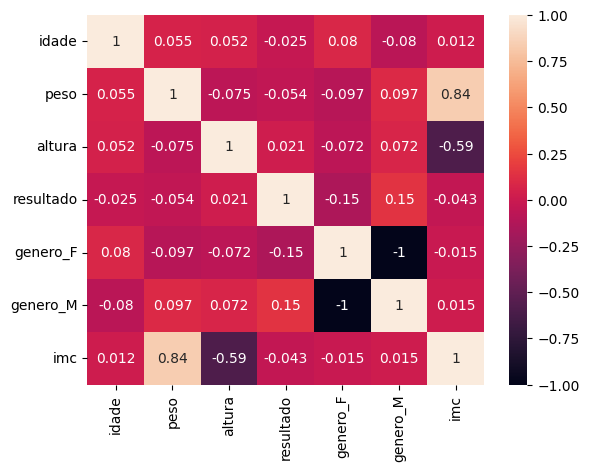

In [17]:
# Apresentar mapa de calor com correlação entre as variáveis
sns.heatmap(df_exames.corr(), vmin=-1, vmax=1, annot=True)

<Axes: >

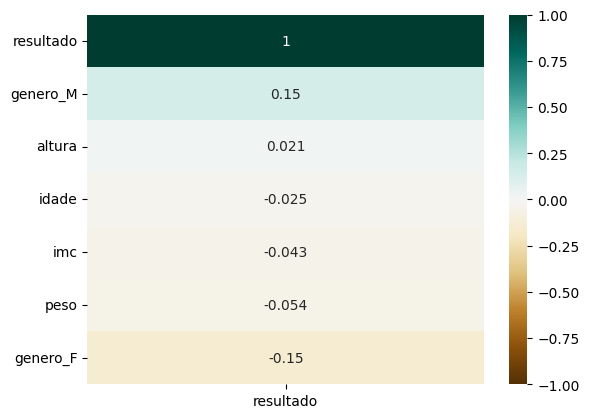

In [18]:
# Mapa de correlação só com a variável target (resultado)
# sns.heatmap(df_exames.corr()[['resultado']])
# Verificar qual variável tem uma maior relação
# sns.heatmap(df_exames.corr()[['resultado']].sort_values(by='resultado', ascending=False), vmin=-1, vmax=1, annot=True)
# Colocar escala de cores ao resultado do seaborn
sns.heatmap(df_exames.corr()[['resultado']].sort_values(by='resultado', ascending=False), vmin=-1, vmax=1, annot=True, cmap='BrBG')

array([[<Axes: xlabel='idade', ylabel='idade'>,
        <Axes: xlabel='peso', ylabel='idade'>,
        <Axes: xlabel='altura', ylabel='idade'>,
        <Axes: xlabel='resultado', ylabel='idade'>,
        <Axes: xlabel='genero_F', ylabel='idade'>,
        <Axes: xlabel='genero_M', ylabel='idade'>],
       [<Axes: xlabel='idade', ylabel='peso'>,
        <Axes: xlabel='peso', ylabel='peso'>,
        <Axes: xlabel='altura', ylabel='peso'>,
        <Axes: xlabel='resultado', ylabel='peso'>,
        <Axes: xlabel='genero_F', ylabel='peso'>,
        <Axes: xlabel='genero_M', ylabel='peso'>],
       [<Axes: xlabel='idade', ylabel='altura'>,
        <Axes: xlabel='peso', ylabel='altura'>,
        <Axes: xlabel='altura', ylabel='altura'>,
        <Axes: xlabel='resultado', ylabel='altura'>,
        <Axes: xlabel='genero_F', ylabel='altura'>,
        <Axes: xlabel='genero_M', ylabel='altura'>],
       [<Axes: xlabel='idade', ylabel='resultado'>,
        <Axes: xlabel='peso', ylabel='resultado'>,


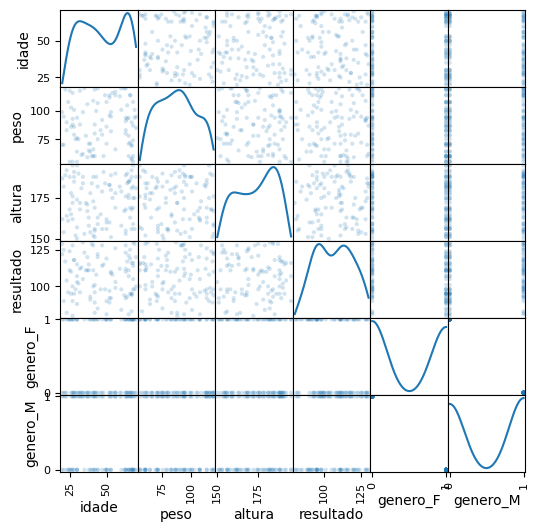

In [12]:
# Plot de Scatter (Dispersão) com correlação
pd.plotting.scatter_matrix(df_exames, alpha=0.2, figsize=(6,6), diagonal='kde')

array([[<Axes: title={'center': 'idade'}>,
        <Axes: title={'center': 'peso'}>,
        <Axes: title={'center': 'altura'}>],
       [<Axes: title={'center': 'resultado'}>,
        <Axes: title={'center': 'genero_F'}>,
        <Axes: title={'center': 'genero_M'}>]], dtype=object)

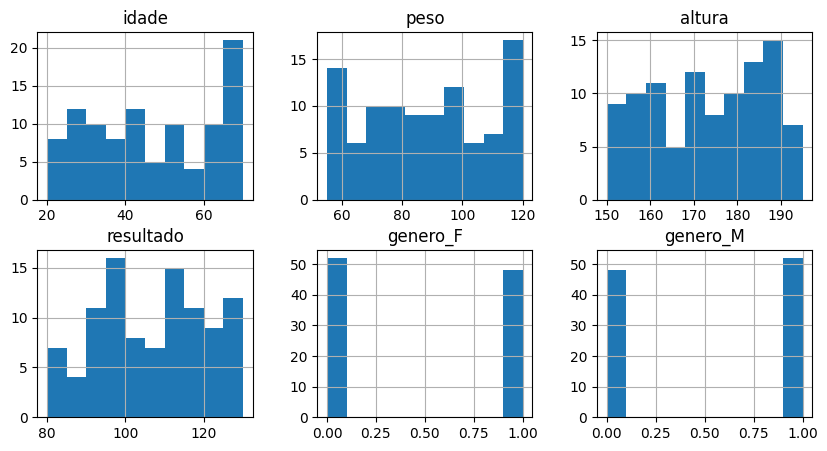

In [13]:
# Histograma de todas as variáveis
df_exames.hist(layout=(2,3), figsize=(10,5))

In [14]:
# Criar uma feature nova
# IMC (Índice de massa corporal)
# IMC = peso (kg) / altura (m) ^2
df_exames['imc'] = (df_exames['peso'] / ((df_exames['altura']/100)**2))

In [15]:
df_exames.head(10)

,idade,peso,altura,resultado,genero_F,genero_M,imc
0,46,83,165,98,0,1,30.486685
1,23,83,164,82,1,0,30.859607
2,39,71,154,93,0,1,29.937595
3,26,103,165,95,1,0,37.832874
4,27,55,176,100,0,1,17.755682
5,64,93,190,117,0,1,25.761773
6,21,70,182,90,1,0,21.132713
7,60,101,179,84,1,0,31.522112
8,63,83,189,92,1,0,23.235632
9,65,78,175,121,1,0,25.469388


In [16]:
df_exames.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   idade      100 non-null    int64  
 1   peso       100 non-null    int64  
 2   altura     100 non-null    int64  
 3   resultado  100 non-null    int64  
 4   genero_F   100 non-null    int64  
 5   genero_M   100 non-null    int64  
 6   imc        100 non-null    float64
dtypes: float64(1), int64(6)
memory usage: 5.6 KB


In [19]:
# Modelo de regressão linear
# Imagine que eu quero encontrar uma relação entre tempo de casa em anos e o salário da pessoa
# Dado que uma pessoa tenha X tempo de casa, qual deveria ser o salário
dict_regressao = {'tempo_casa': [1, 3, 6, 9, 10, 14, 18], 'salario': [1500, 3000, 4500, 6000, 7000, 8500, 10000]}

In [20]:
df_regressao_simples = pd.DataFrame.from_dict(dict_regressao)

<Axes: xlabel='tempo_casa', ylabel='salario'>

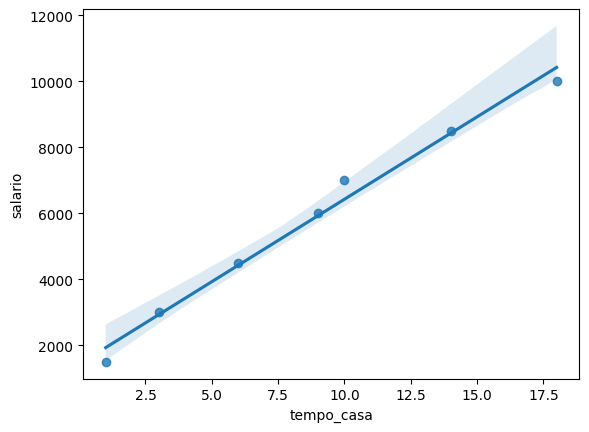

In [21]:
sns.regplot(data=df_regressao_simples, x="tempo_casa", y="salario")

O que esse plot está nos mostrando?
Ele fez um plot para uma regressão, ele colocou os pontos e traçou uma reta, essa reta representa um calculou de forma que os pontos fossem mais próximos, qual é a reta que eu consigo passar pela maioria dos pontos do meu conjunto de dados, veja que ele não passa por todos os dados

A equação da reta é y = ax + b

Atráves de um cálculo, usando os dados plotados ele calcula os valores de A e B e toda vez que eu colocar um X novo (uma pessoa nova que tem 11 anos de casa), eu consigo ter o salário daquela nova pessoa

E é exatamente o que iremos fazer com o exemplo da diabetes, com uma diferença que não teremos apenas 1 A ou 1 B, mas vários a e b´s que é todos as variáveis que temos no nosso modelo

In [22]:
# Importar bibliotecas do sklearn
from sklearn.linear_model import LinearRegression
# Biblioteca que nos ajuda a separar os dados entre treino e teste
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, r2_score

In [24]:
# Modelo 1 - Sem IMC
# Por convenção, a gente dividi os dados entre variáveis dependentes (target/resultado) 
# e variáveis independentes (que iremos usar para o treinamento para avaliar quanto 
# que o padrão dessas variáveis se relaciona com o padrão da variável resposta)

# X para nós é tudo aquilo que não é a variável Target ou resposta
X = df_exames.drop(columns=['imc', 'resultado'])
# y = variável resposta
y = df_exames['resultado']

In [25]:
# Dividir conjunto entre treino e teste
# train_size quanto que você quer do seu dataset seja para treinamento (percentual)
# train_test_split(X, y, train_size=0.7) -> se colocarmos assim, toda vez que o modelo rodar, ele irá gerar registros
# aleatórios para o conjunto de testes e treinamento, mas existe uma forma de controlar isso para que eu possa
# reproduzir sempre com os mesmos dados

# random_state = faz com que os splits sejam iguais
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=51)

In [28]:
# Treinar modelo de regressão linear - Modelo 1
# Iremos colocar para ele dados do nosso conjunto de treinamento, as variáveis dependentes e independente e ele irá
# buscar por um algoritmo de regressão linear para criar um modelo que traga um padrão entre as variáveis entre X e Y

# Treine o modelo com os dados de treinamento para encontrar uma regressão linear (reta) entre x e y
model_1 = LinearRegression().fit(X_train, y_train)

In [29]:
# Gerar predições do conjunto de testes com base no Modelo 1
# Como sabemos que um modelo generalizou? Se pegarmos o nosso modelo de testes e manda ele fazer uma previsão
# A gente vai comparar a previsão do modelo com os nossos dados reais que nós já temos
# Por convenção a gente chama o conjunto de dados resultante da previsão de y_pred
y_pred = model_1.predict(X_test)

In [31]:
# Equação da reta - Regressão linear
# y = ax + b
model_1.coef_

array([-0.00694816, -0.0788198 ,  0.10991808, -2.96913112,  2.96913112])

model_1.coef_ para cada variável dentro do nosso modelo ele tem um coeficiente, ou seja, para cada X ele tem um A, exemplo: A1, A2, A3...

In [32]:
model_1.intercept_

np.float64(94.21133142019875)

model_1.intercept_ mostra quais foram os coeficientes utilizados nesse modelo

In [33]:
# R2 Score 
# Verificar numa escala de -∞ (- infinito) até 1, o quanto que x explica y
# Quanto mais próximo de 1, melhor meu modelo, no caso dessa regressão linear

# R2 Score no conjunto de treinamento
model_1.score(X_train, y_train)

0.06218388634297267

In [34]:
# R2 Score - Conjunto de teste
model_1.score(X_test, y_test)

-0.1364090447910642

Ou seja, esse modelo aqui, não conseguiu nem performar bem no conjunto de treinamento nem no conjunto de teste e ainda os coeficientes são bem diferentes. Tem todas as características de ser um underfit (um subajuste)

In [35]:
# R2 Score - Testes
# Forma utilizando função separada do sklearn
# Mas conforme acima pode usar o do modelo que já vem imbutido
r2_score(y_test, y_pred)

-0.1364090447910642

In [36]:
# MAE (Mean Absolute Error)
# Erro médio absoluto, ou seja, qual a diferença média entre y_test (y verdadeiro) e y_pred (y predição)
mean_absolute_error(y_test, y_pred)

np.float64(12.695569181179541)

A informação retornada é na mesma ordem de grandeza do nosso resultado
O nosso resultado do exame de hemoglobina (diabetes) é expresso em miligramas/decilitro
Eu tenho um erro médio absoluto nesse conjunto de testes de 12.69 ml/dl, que é um erro considerável

In [37]:
# Modelo 2
# Iremos transformar a regressão linear múltipla em regressão linear simples
# Iremos utilizar apenas uma variável para tentar fazer a previsão que é o IMC
X = pd.DataFrame(df_exames['imc'])
y = df_exames['resultado']

In [38]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=51)

In [39]:
# Treinar o algoritmo de regressão linear - Modelo 2
model_2 = LinearRegression().fit(X_train, y_train)

In [41]:
# Gerar predição com base no modelo para o conjunto de testes
y_pred = model_2.predict(X_test)

In [42]:
model_2.coef_

array([-0.21677589])

In [43]:
model_2.intercept_

np.float64(112.15019229088836)

In [44]:
# R2 Score no conjunto de treinamento
model_2.score(X_train, y_train)

0.015285962664806862

In [45]:
# R2 Score no conjunto de testes
model_2.score(X_test, y_test)

-0.0889832856240178

In [46]:
# MAE (Mean Absolute Error)
mean_absolute_error(y_test, y_pred)

np.float64(12.505651407060103)

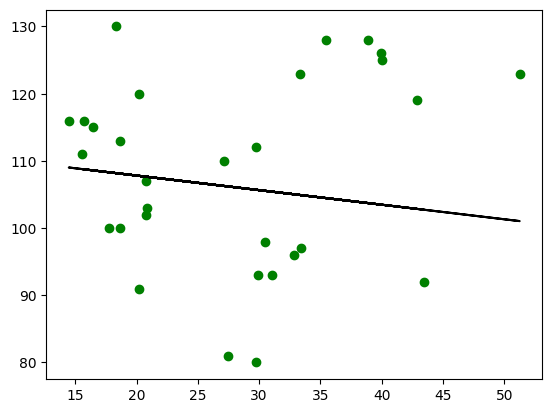

In [48]:
# Explique a variável resultado atráves da variável IMC
# Mostrar como a reta foi calculada
plt.scatter(X_test, y_test, color='g')
plt.plot(X_test, y_pred, color='k')

Isso explica o motivo do nosso R2 Score ser muito baixo (visualmente), temos um conjunto de dados muito aleatórios  